# Importando as biblitecas necessárias. 

O Pandas é uma bibliotecas python para manipulação de grande quantidade de dados. 

O Matplotlib é a biblioteca para exibir gráficos, o seaborn é um complemento para deixar os gráficos mais apresentáveis. 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

Lendo o arquivo e imprimindo o cabeçalho do dataframe:

In [3]:
df = pd.read_csv('Cordão_1.csv', sep=';', decimal=',')

df.head(10)

,Tempo (s),Tensão (V),Corrente (A)
0,0.0000,18.89,48.09
1,0.0002,18.70,46.91
2,0.0004,18.70,48.07
3,0.0006,18.70,46.89
4,0.0008,18.70,48.05
5,0.0010,18.70,48.07
6,0.0012,18.70,46.89
7,0.0014,18.70,46.89
8,0.0016,18.50,46.87
9,0.0018,18.50,46.89


Analisando o sinal, percebi que o começo tem uma quantidade diferente de dados em relação, por isso, precisei cortar os dados iniciais:


In [5]:
df = df[19:]

Para verificar o sinal, vamos gerar um gráfico. 

Os valores dentro das variáveis ```quant_min``` e  ```quant_max``` será utéis para determinar o limite de exibição:

Tamanho da janela: 45


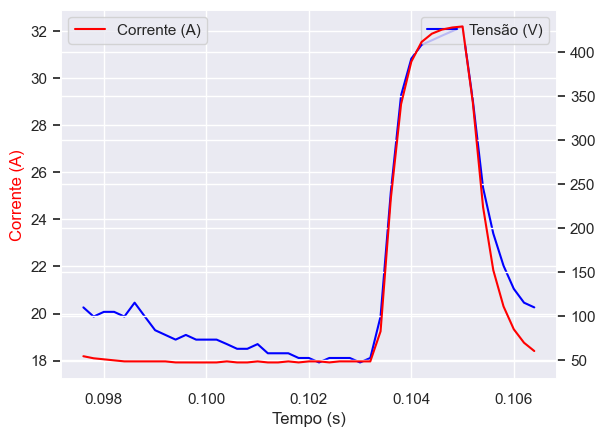

In [10]:
onda_analisada = 10 # Usei para mostrar a 10ª onda
tamanho_janela = 45

quant_min = tamanho_janela * onda_analisada
quant_max = quant_min + tamanho_janela
print(f'Tamanho da janela: {quant_max - quant_min}')

fig, ax1 = plt.subplots()

df[quant_min:quant_max].plot.line(x='Tempo (s)', y = 'Tensão (V)', ax = ax1, color='blue')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Tensão (V)', color = 'blue')
ax1.legend(loc='upper right')

# Cria um segundo eixo:
ax2 = ax1.twinx()
df[quant_min:quant_max].plot.line(x='Tempo (s)', y = 'Corrente (A)', ax = ax2, color='red')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Corrente (A)', color = 'red')

# adjust the legend position:
ax2.legend(loc='upper left')

Para achar o valor máximo de cada onde vamos precisar a "rolar" os dados, para isso tem a variável ```tamanho_janela``` que deverá ser ajustada para que não ocorra sinal duplicado ou sem sinal em cada janela.

Esse valor eu chutei analisando o gráfico anterior, e verificando os valores limites. 

**Mesmo assim, será necessário analisar com mais calma as ondas e verificar esse valor limite**

In [97]:
df['Tensão_max'] = df['Tensão (V)'].rolling(tamanho_janela).max()
df['Corrente_max'] = df['Corrente (A)'].rolling(tamanho_janela).max()

In [102]:
tensão_média = df['Tensão_max'].mean()
print(f'Tensão máxima média = {tensão_média:.2f} V')

corrente_média = df['Corrente_max'].mean()
print(f'Corrente máxima média = {corrente_média:.2f} A')

Tensão máxima média = 32.21 V
Corrente máxima média = 434.89 A
